In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
from matplotlib import style
style.use('seaborn-v0_8')
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head()

,Row,Id,Surname,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Row          10000 non-null  int64  
 1   Id           10000 non-null  int64  
 2   Surname      10000 non-null  object 
 3   Score        10000 non-null  int64  
 4   Nationality  10000 non-null  object 
 5   Gender       10000 non-null  object 
 6   Age          10000 non-null  int64  
 7   Tenure       10000 non-null  int64  
 8   Balance      10000 non-null  float64
 9   Products     10000 non-null  int64  
 10  Card         10000 non-null  int64  
 11  Active       10000 non-null  int64  
 12  Salary       10000 non-null  float64
 13  Exited       10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df= df.drop(columns=['Row','Id','Surname'])

In [8]:
df.duplicated().sum()

0

In [9]:
df['Age_bins']= pd.cut(df['Age'],bins= [18,30,50,70,92],labels= ['18-29','30-49','50-69','70-92'])

In [10]:
df.describe()

,Score,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.head()

,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited,Age_bins
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,30-49
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,30-49
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,30-49
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-49
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,30-49


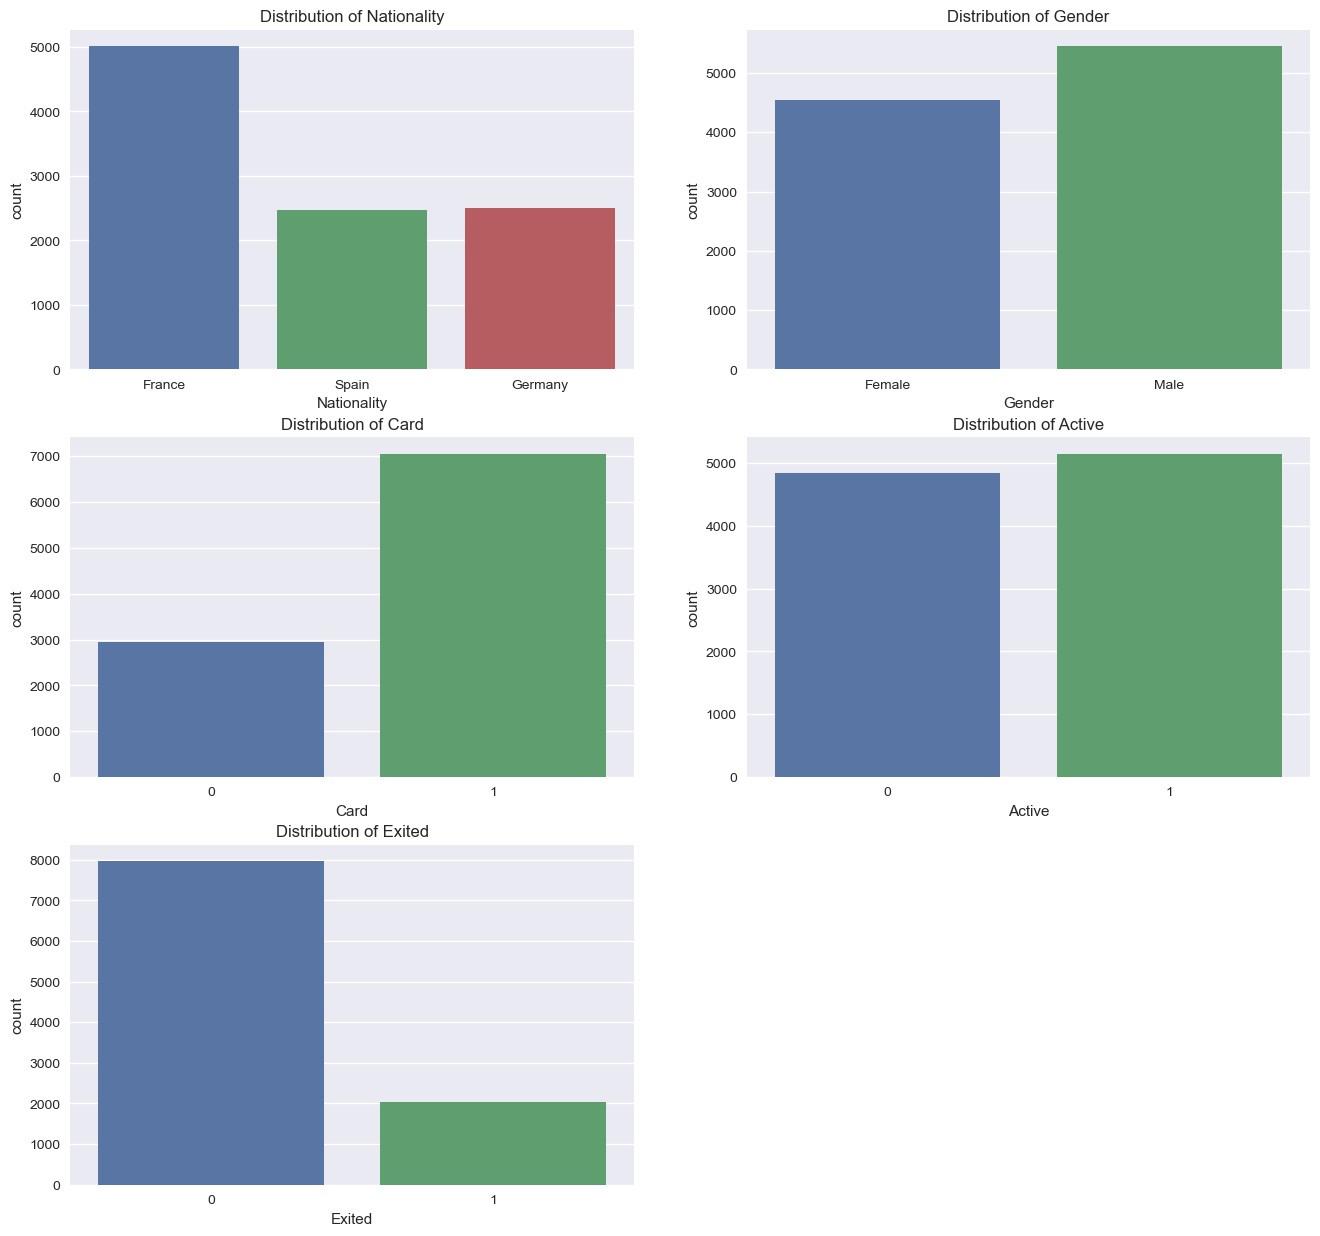

In [12]:
cat= ['Nationality','Gender','Card','Active','Exited']

plt.figure(figsize=(16,15))

for i,col in enumerate(cat):
    plt.subplot(3,2,i +1)
    sns.countplot(df,x=col)
    plt.title(f'Distribution of {col}')

plt.show()

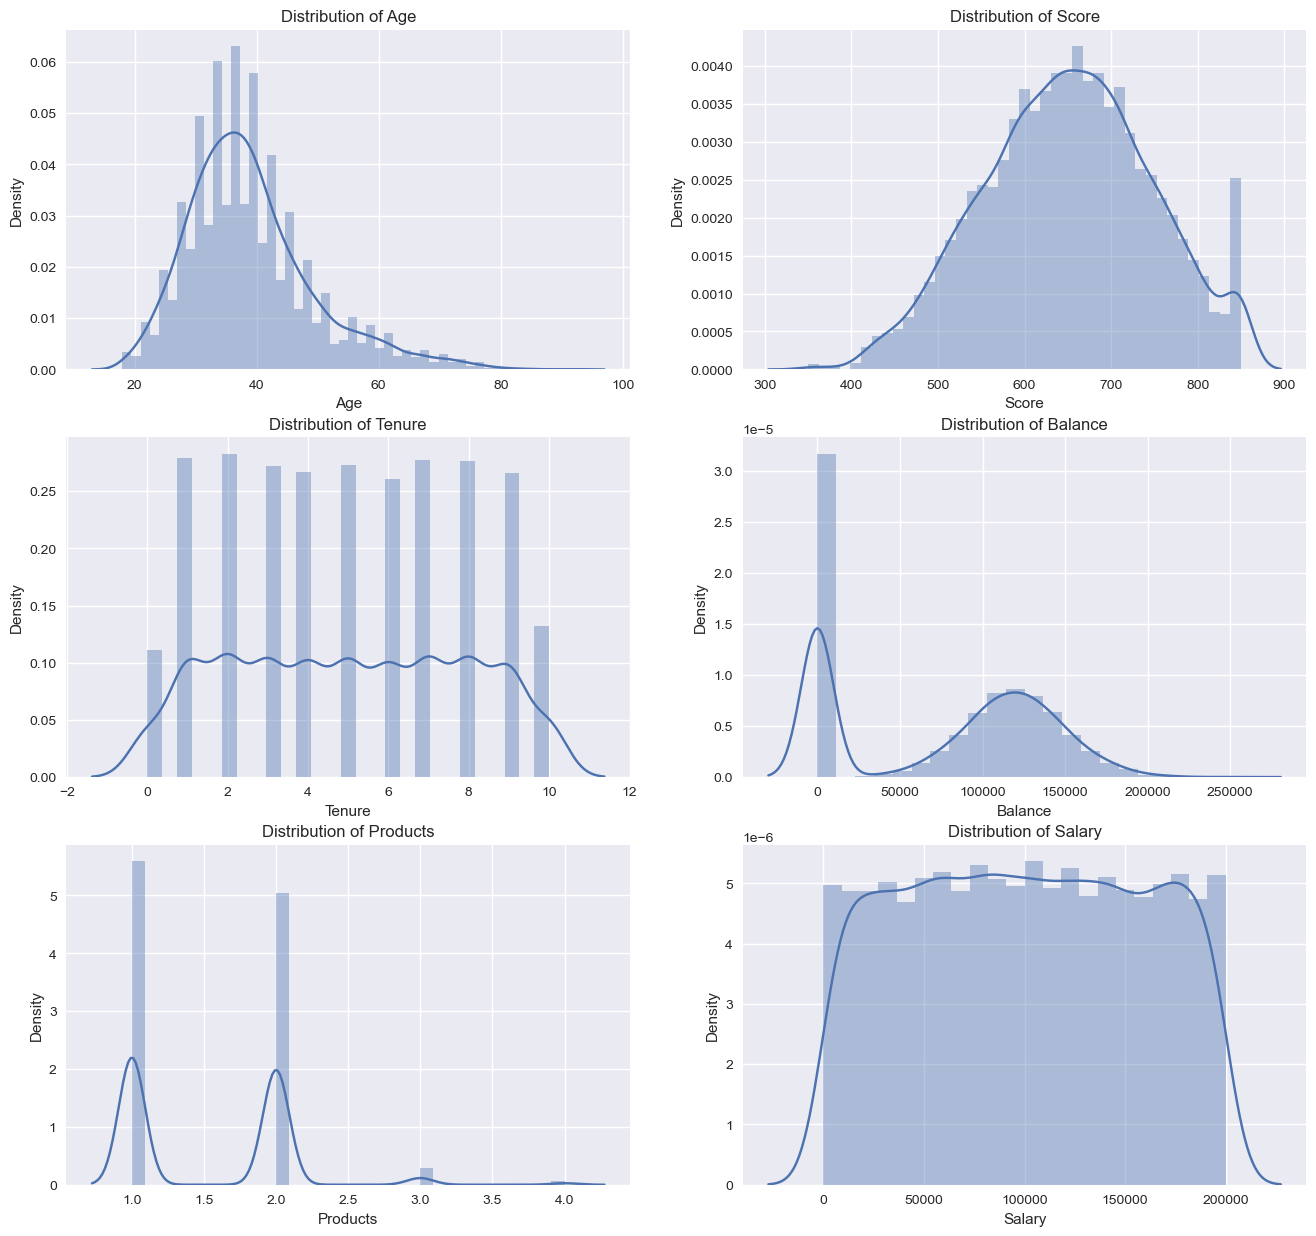

In [13]:
num= ['Age','Score','Tenure','Balance','Products','Salary']

plt.figure(figsize=(16,15))

for i,col in enumerate(num):
    plt.subplot(3,2,i +1)
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')

plt.show()

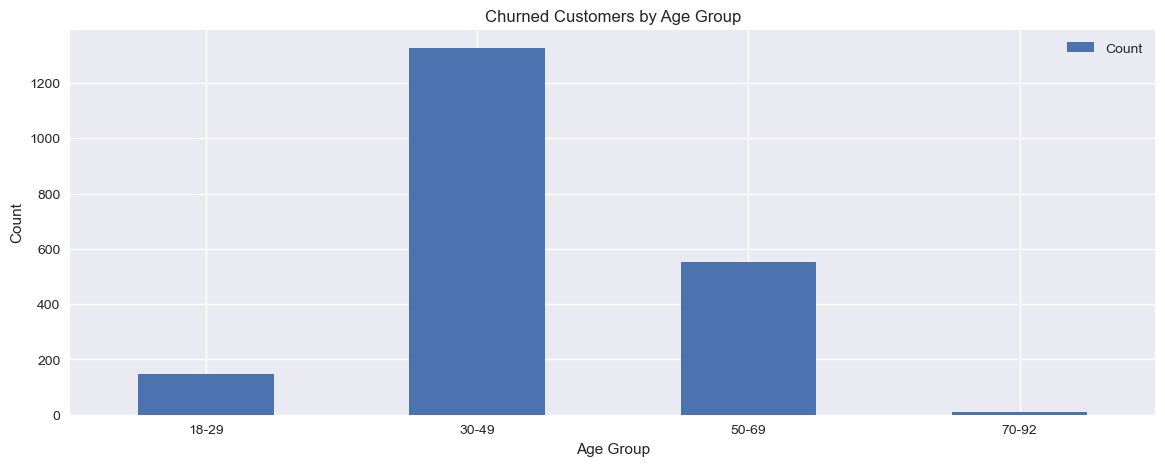

In [15]:
# age= df[['Age_bins','Exited']]

# age= age[(age['Exited']==1)]
# age= age.groupby('Age_bins')['Exited'].value_counts().reset_index()
# age.set_index('Age_bins',inplace=True)
# age.plot(kind='bar',figsize=(14,5))
# plt.title('Churned customers by age group')
# plt.ylabel('Count')
# plt.xlabel('Age Group')
# plt.xticks(rotation= 0, ha='center')

# plt.show()
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
age = df[['Age_bins', 'Exited']]

# Filter out churned customers
age = age[age['Exited'] == 1]

# Group by 'Age_bins' and count the number of churned customers
age_counts = age.groupby('Age_bins')['Exited'].count().reset_index()

# Rename the columns for better understanding
age_counts.columns = ['Age_bins', 'Count']

# Set 'Age_bins' as the index
age_counts.set_index('Age_bins', inplace=True)

# Plot the data
age_counts.plot(kind='bar', figsize=(14, 5))

# Set plot title and labels
plt.title('Churned Customers by Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.xticks(rotation=0, ha='center')

# Show the plot
plt.show()


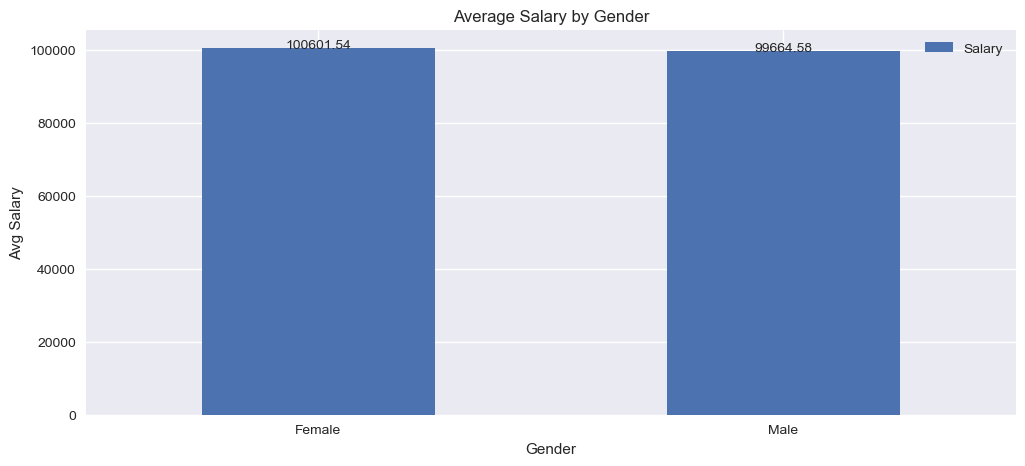

In [16]:
salary= df[['Gender','Salary']]

salary =salary.groupby('Gender')['Salary'].mean().reset_index()
salary.set_index('Gender',inplace= True)
salary= round(salary,2)
salary.plot(kind='bar',figsize=(12,5))
plt.title('Average Salary by Gender')
plt.ylabel('Avg Salary')
plt.xticks(rotation=0, ha='center')  
plt.legend(loc='upper right') 
           
for i,v in enumerate(salary['Salary']):
    plt.text(i,v +0.5 , str(v),ha='center')

plt.show()

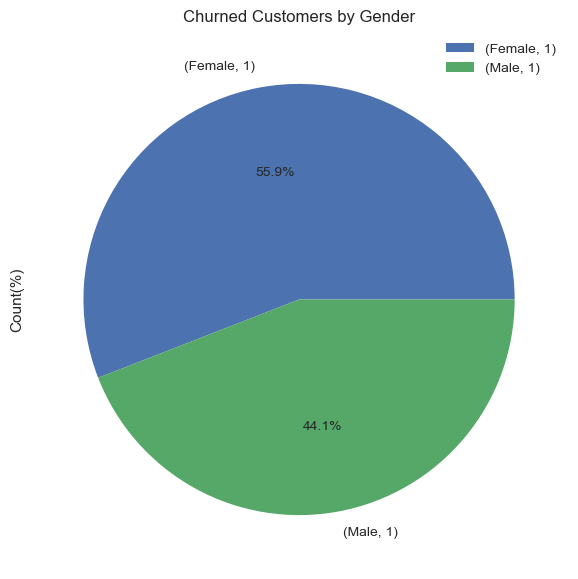

In [17]:
gen= df[['Gender','Exited']]
gen_churn= gen[(gen['Exited']==1)]
gen_churn= gen_churn.groupby('Gender')['Exited'].value_counts()
#gen_churn.set_index('Gender',inplace=True)
gen_churn.plot(kind='pie',y= gen_churn.index,autopct='%1.1f%%',figsize=(10,7))
plt.title('Churned Customers by Gender')
plt.ylabel('Count(%)')
plt.legend()

plt.show()

In [18]:
Total_customers= len(df)
Total_customers

10000

In [19]:
churned_customers= df[(df['Exited']==1)]
churned_customers= len(churned_customers)
churned_customers

2037

In [20]:
churn_rate= churned_customers/Total_customers*100
round(churn_rate,1)

20.4

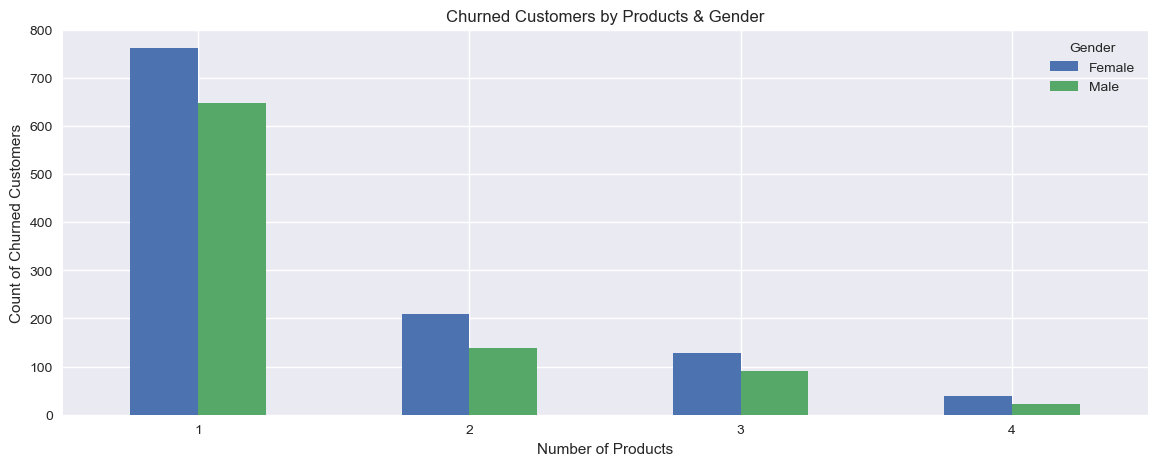

In [22]:
product = df[['Exited', 'Products', 'Gender']]

# Filter out churned customers
prod = product[product['Exited'] == 1]

# Group by 'Products' and 'Gender' and count the number of occurrences
prod_counts = prod.groupby(['Products', 'Gender']).size().reset_index(name='Count')

# Pivot the table to have a proper format for plotting
prod_pivot = prod_counts.pivot(index='Products', columns='Gender', values='Count').fillna(0)

# Plot the data
prod_pivot.plot(kind='bar', figsize=(14, 5))

# Set plot title and labels
plt.title('Churned Customers by Products & Gender')
plt.xlabel('Number of Products')
plt.ylabel('Count of Churned Customers')
plt.xticks(rotation=0, ha='center')

# Show the plot
plt.show()

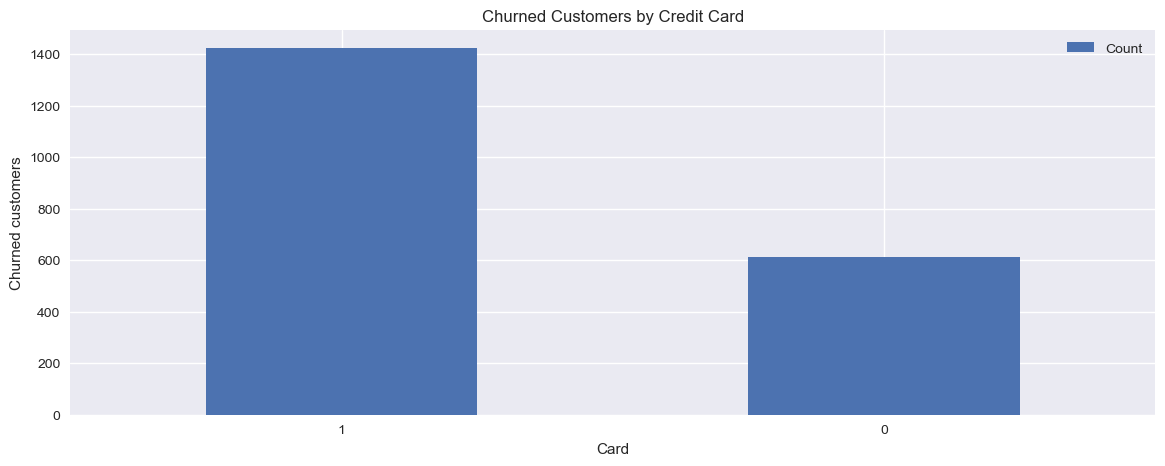

In [24]:
# Assuming df is your DataFrame
card = df[['Exited', 'Card']]

# Filter out churned customers
card = card[card['Exited'] == 1]

# Group by 'Card' and count the number of occurrences
card_counts = card['Card'].value_counts().reset_index()

# Rename the columns for better understanding
card_counts.columns = ['Card', 'Count']

# Set 'Card' as the index
card_counts.set_index('Card', inplace=True)

# Plot the data
card_counts.plot(kind='bar', figsize=(14, 5))

# Set plot title and labels
plt.title('Churned Customers by Credit Card')
plt.xlabel('Card')
plt.ylabel('Churned customers')
plt.xticks(rotation=0, ha='center')

# Show the plot
plt.show()

In [25]:
score= df[['Score','Exited']]
score= score[(score['Exited']==1)]
score= score.groupby('Exited')['Score'].mean()
round(score)

Exited
1    645.0
Name: Score, dtype: float64

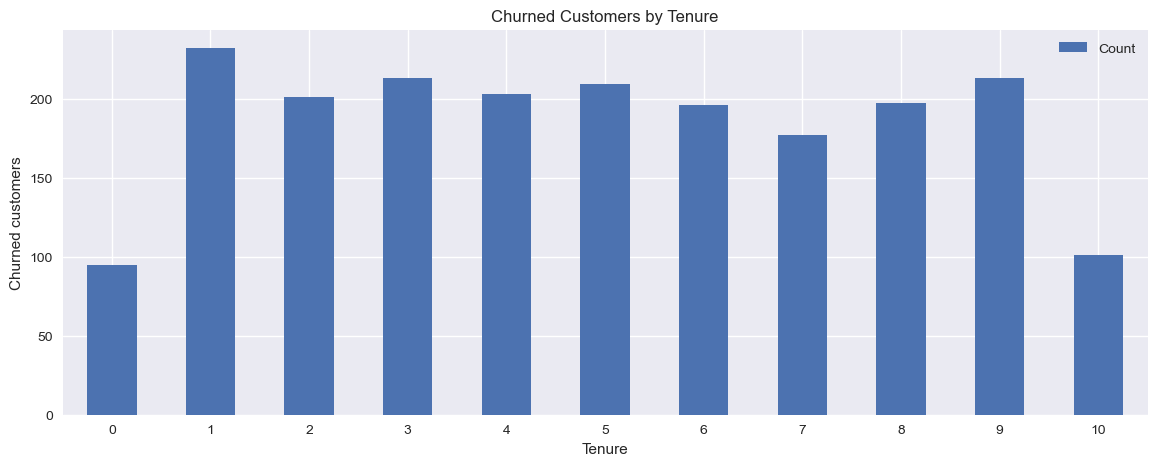

In [27]:
ten = df[['Exited', 'Tenure']]

# Filter out churned customers
ten = ten[ten['Exited'] == 1]

# Group by 'Tenure' and count the number of occurrences
ten_counts = ten['Tenure'].value_counts().reset_index()

# Rename the columns for better understanding
ten_counts.columns = ['Tenure', 'Count']

# Sort the values by 'Tenure'
ten_counts = ten_counts.sort_values(by='Tenure')

# Set 'Tenure' as the index
ten_counts.set_index('Tenure', inplace=True)

# Plot the data
ten_counts.plot(kind='bar', figsize=(14, 5))

# Set plot title and labels
plt.title('Churned Customers by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churned customers')
plt.xticks(rotation=0, ha='center')

# Show the plot
plt.show()

In [28]:
le= LabelEncoder()

cat= ['Nationality','Gender','Card','Active','Exited']

for i in (cat):
    df[i]= le.fit_transform(df[i])

In [29]:
X= df.drop(columns=['Exited','Age_bins'],axis=1)

y=df['Exited']

In [30]:
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=0)

X_re,y_re= smote.fit_resample(X,y)

print(X_re.shape,y_re.shape)

(15926, 10) (15926,)


In [31]:
sc= StandardScaler()

num= ['Age','Score','Tenure','Balance','Products','Salary']
for i in (num):
    df[i]= sc.fit_transform(df[i].values.reshape(-1,1))

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X_re, y_re, test_size=0.30, random_state= 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11148, 10), (4778, 10), (11148,), (4778,))

In [33]:
log_reg= LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred= log_reg.predict(X_test)
acc= accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      2293
           1       0.69      0.65      0.67      2485

    accuracy                           0.67      4778
   macro avg       0.67      0.67      0.67      4778
weighted avg       0.67      0.67      0.67      4778



In [36]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
y_pred= rf.predict(X_test)
acc_rf= accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2339
           1       0.88      0.84      0.86      2439

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778



In [38]:
gb= GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [39]:
y_pred= gb.predict(X_test)
acc_gb= accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      2407
           1       0.85      0.84      0.84      2371

    accuracy                           0.84      4778
   macro avg       0.84      0.84      0.84      4778
weighted avg       0.84      0.84      0.84      4778



In [40]:
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [41]:
y_pred= knn.predict(X_test)
acc_knn= accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.58      0.71      0.64      2007
           1       0.75      0.64      0.69      2771

    accuracy                           0.67      4778
   macro avg       0.67      0.67      0.66      4778
weighted avg       0.68      0.67      0.67      4778



In [42]:
models= pd.Series([acc,acc_rf,acc_gb,acc_knn],['LogReg','RF','GB','KNN'])

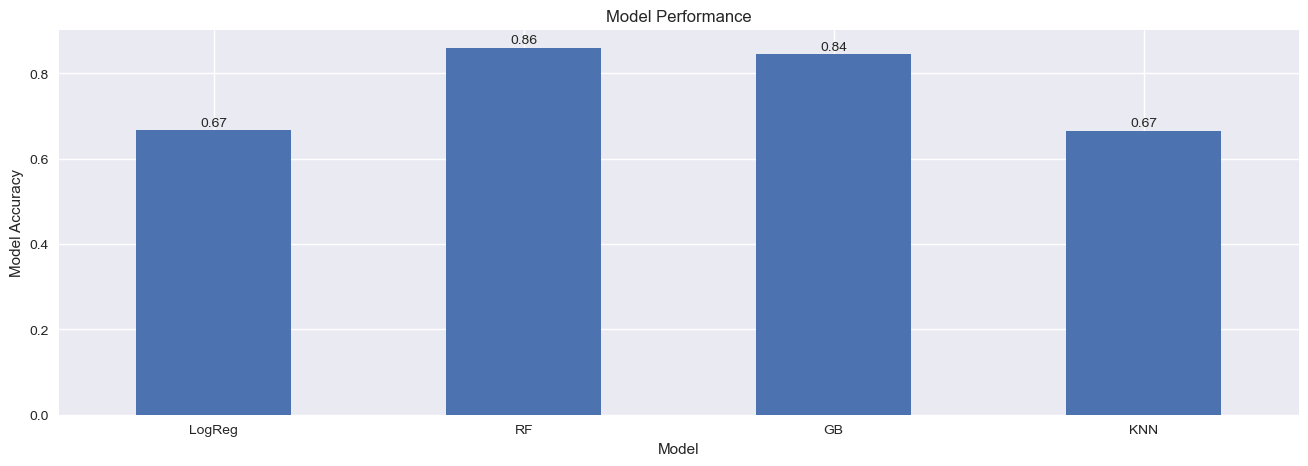

In [43]:
models.plot(kind='bar',figsize=(16,5))
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Model Accuracy')
plt.xticks(rotation=0,ha='center')

for i,v in enumerate(models):
    plt.text(i,v + 0.01,str(round(v,2)),ha='center')
plt.show()

In [44]:
import pickle
pickle.dump(rf,open('./churn_pred_rf.sav', 'wb'))

In [45]:
pickle.load(open('churn_pred_rf.sav', 'rb'))

RandomForestClassifier()